## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from matplotlib import cm
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)

In [3]:
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset
mouse_metadata_results = mouse_metadata.merge(study_results)


In [5]:
# Checking the number of mice in the DataFrame.
mouse_count = mouse_metadata_results['Mouse ID'].unique()
len(mouse_count)

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_df = mouse_metadata_results[mouse_metadata_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep = 'first')]

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_metadata_results = mouse_metadata_results.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = 'first')
clean_mouse_metadata_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Drug Regimen        1888 non-null   object 
 2   Sex                 1888 non-null   object 
 3   Age_months          1888 non-null   int64  
 4   Weight (g)          1888 non-null   int64  
 5   Timepoint           1888 non-null   int64  
 6   Tumor Volume (mm3)  1888 non-null   float64
 7   Metastatic Sites    1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB


In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_mouse_metadata_results['Mouse ID'].unique()
len(mouse_count)


249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

mouse_groupby = clean_mouse_metadata_results.groupby(['Drug Regimen'])
mean = mouse_groupby['Tumor Volume (mm3)'].mean()
median = mouse_groupby['Tumor Volume (mm3)'].median()
variance = mouse_groupby['Tumor Volume (mm3)'].var()
std = mouse_groupby['Tumor Volume (mm3)'].std()
sem = mouse_groupby['Tumor Volume (mm3)'].sem()

data_frame_structure = {
    'mean' : mean,
    'median' : median,
    'variance' : variance,
    'std' : std,
    'sem' : sem
}

mouse_regimen_statistics = pd.DataFrame(data=data_frame_structure)
mouse_regimen_statistics

# This method is the most straightforward, creating multiple series and putting them all together at the end.



,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mouse_regimen_by_regimen_and_tumor_volume = clean_mouse_metadata_results.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
mouse_regimen_by_regimen_and_tumor_volume

# This method produces everything in a single groupby function.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

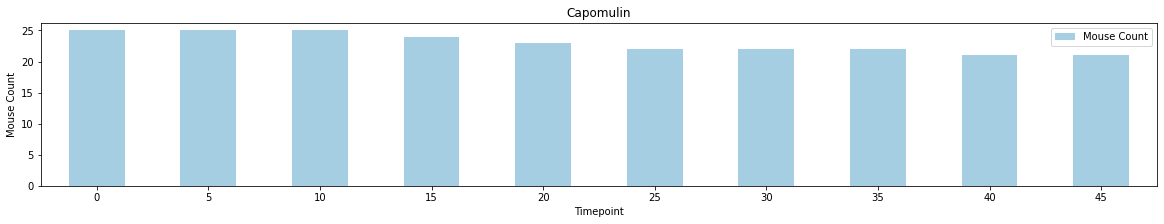

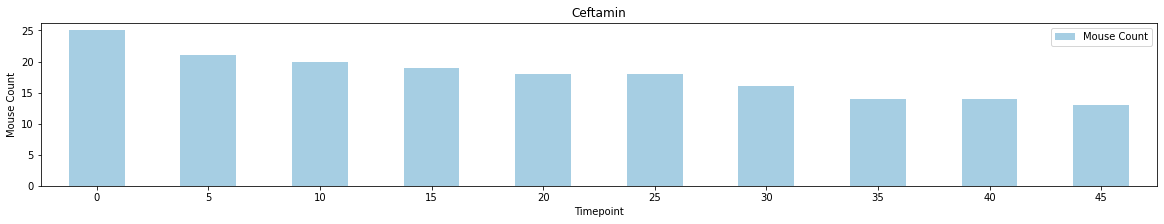

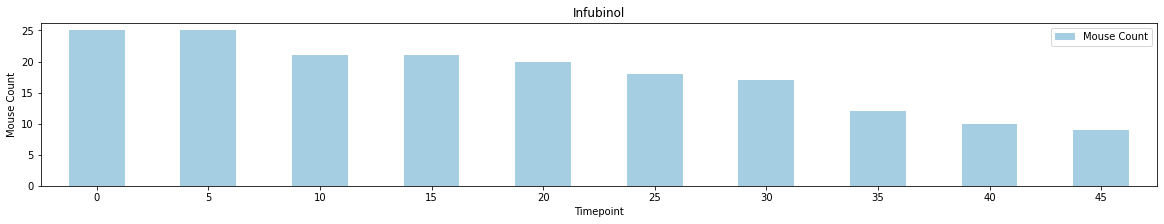

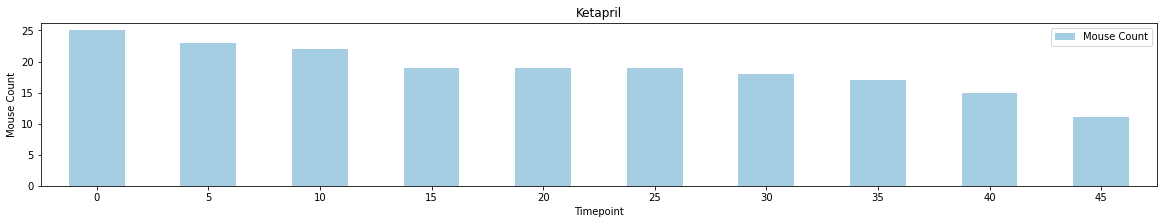

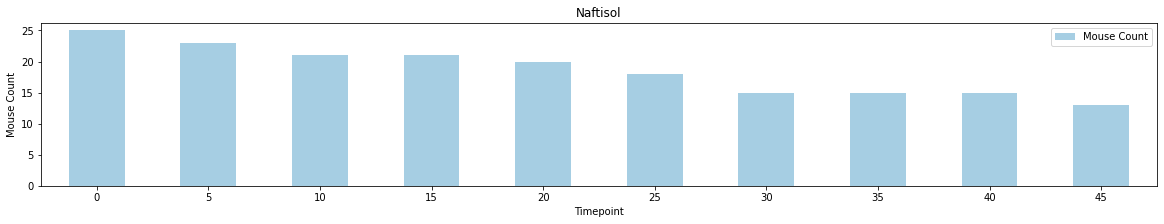

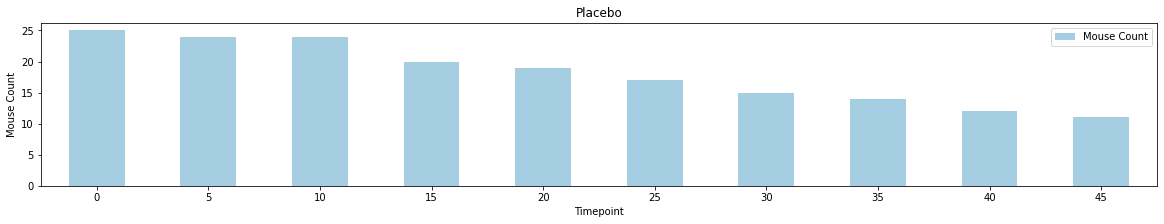

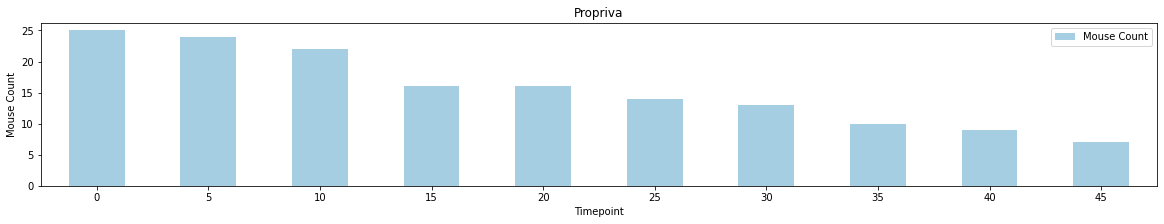

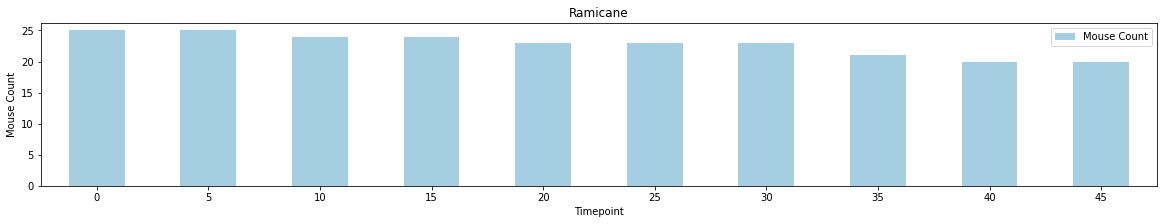

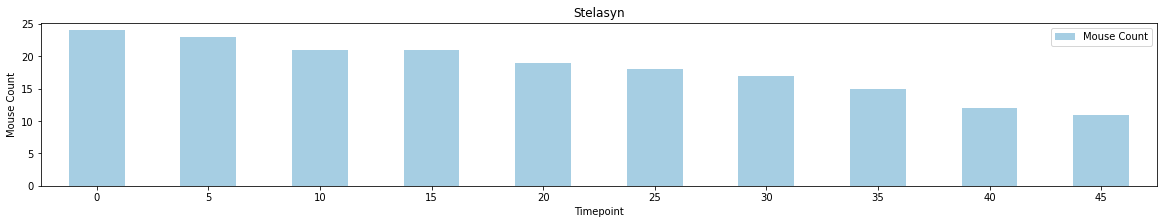

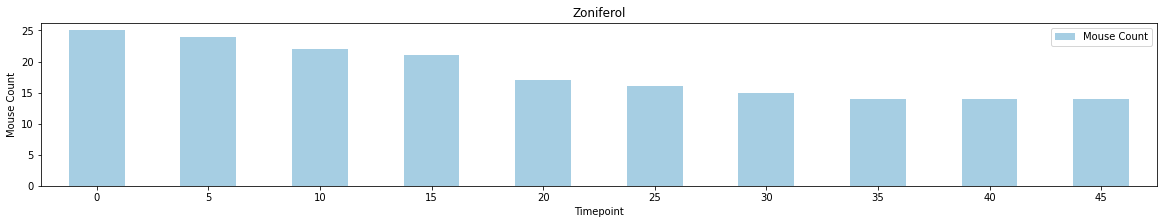

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

mice_treatment = clean_mouse_metadata_results.groupby(['Drug Regimen', 'Timepoint']).agg(
    {
        'Mouse ID' : 'count'
    }
)

mice_treatment = mice_treatment.reset_index()
mice_treatment = mice_treatment.rename(columns={'Mouse ID': 'Mouse Count'})
mice_treatment = mice_treatment.groupby(['Drug Regimen'])

for name, group in mice_treatment:
    bar_df = group[['Timepoint', 'Mouse Count']]
    bar_df = bar_df.set_index('Timepoint')
    bar_df.plot(kind="bar", figsize=(20,3), title = name, rot=0, colormap='Paired')
    plt.ylabel('Mouse Count')
    plt.show()
    

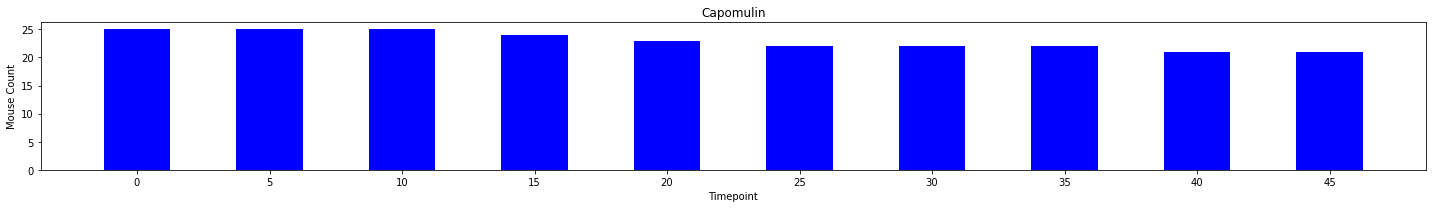

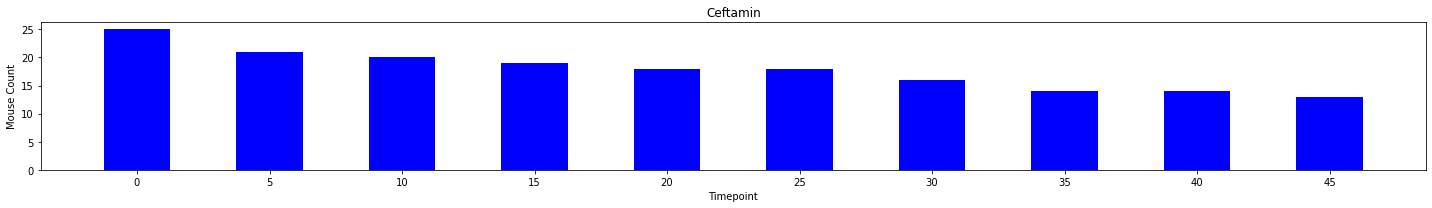

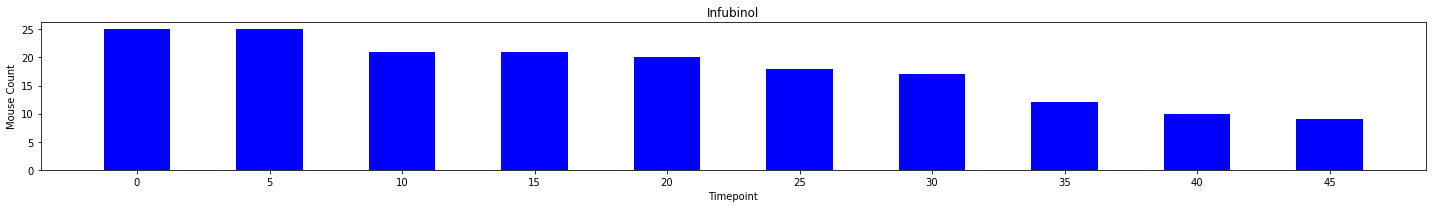

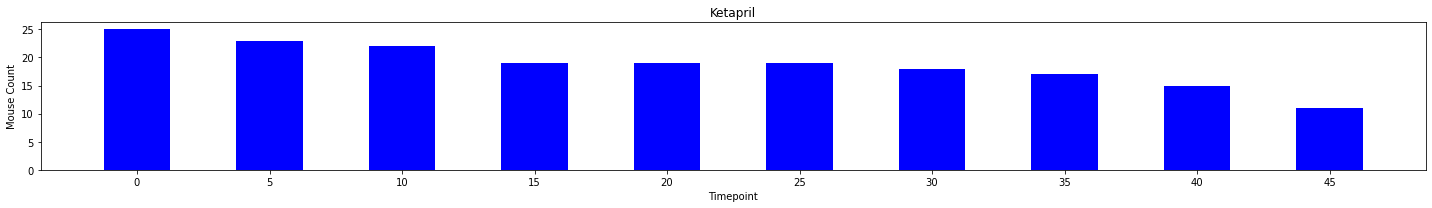

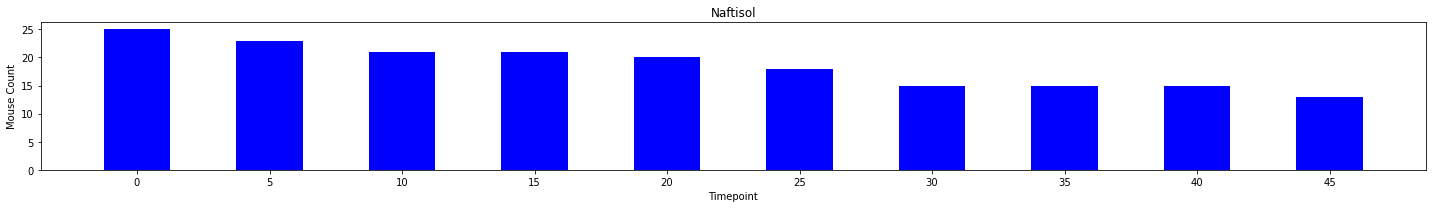

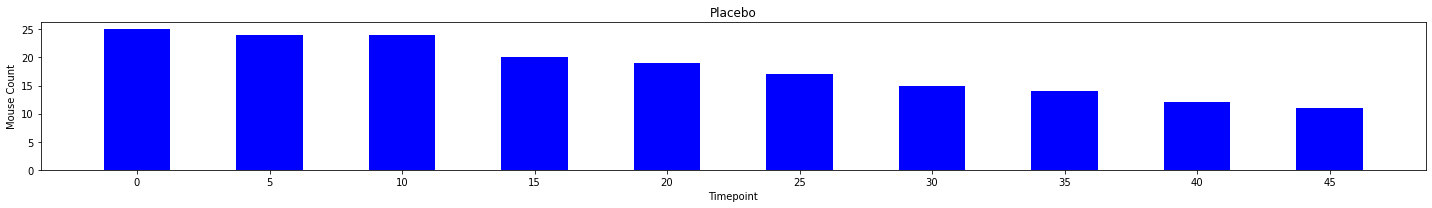

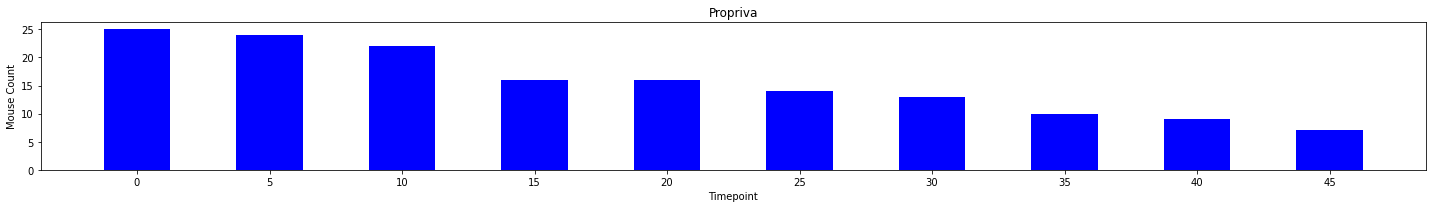

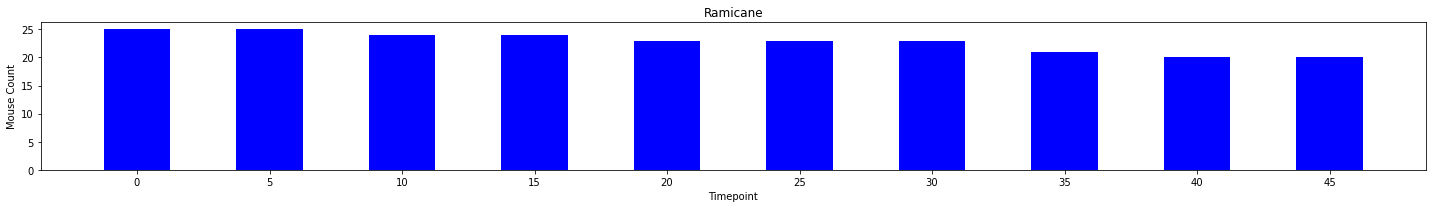

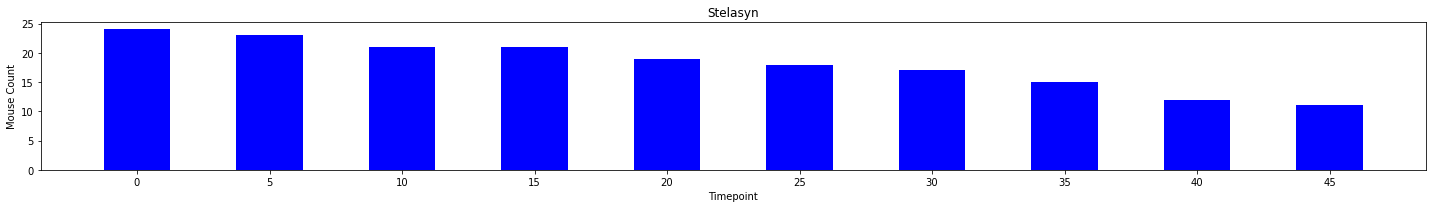

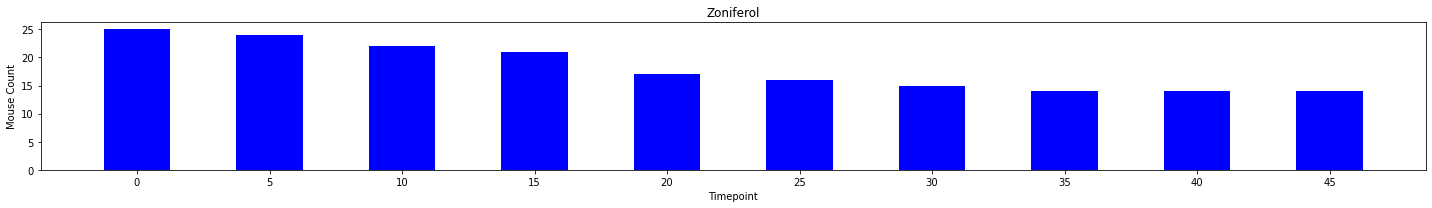

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

for name, group in mice_treatment:
    bar_df = group[['Timepoint', 'Mouse Count']]
    
    x_axis = np.arange(len(bar_df))
    tick_locations = [value for value in x_axis]
    
    plt.figure(figsize=(20,3))
    plt.bar(x_axis, bar_df['Mouse Count'], color='b', align="center", width=0.5)
    # 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
    plt.xticks(tick_locations, bar_df['Timepoint'])
    
    plt.title(name)
    plt.xlabel('Timepoint')
    plt.ylabel('Mouse Count')
    
    plt.tight_layout()
    plt.show()

## Pie Plots

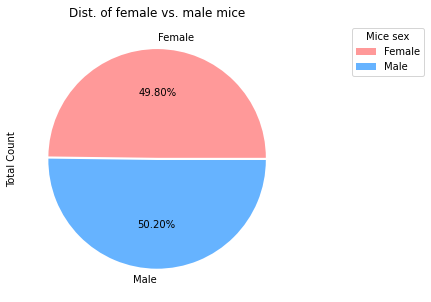

In [14]:
sex_list = clean_mouse_metadata_results['Sex'].unique()
sex_list.sort()

sex_count_list = []
for sex in sex_list:
    this_mice_sex = clean_mouse_metadata_results.loc[clean_mouse_metadata_results['Sex'] == sex]
    unique_mice_of_this_sex = this_mice_sex['Mouse ID'].unique()
    mice_of_this_sex_count = len(unique_mice_of_this_sex)
    sex_count_list.append(mice_of_this_sex_count)

mouse_by_sex_dict = {
    'Sex' : sex_list,
    'Total Count' : sex_count_list 
}

mouse_by_sex_df = pd.DataFrame(data=mouse_by_sex_dict)

# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ['#ff9999','#66b3ff']

ax = mouse_by_sex_df.plot(
    kind = 'pie',
    use_index = False,
    y = 'Total Count',
    figsize = (5, 5),
    title = 'Dist. of female vs. male mice',
    autopct = '%1.2f%%',
    labels = mouse_by_sex_df['Sex'],
    explode = (.01, .01),
    colors = colors
)

ax.legend(
    mouse_by_sex_df['Sex'],
    title="Mice sex",
    loc="upper right",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

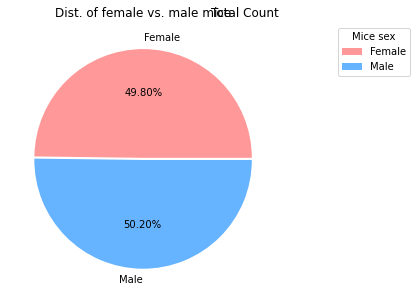

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw = dict(aspect="equal"))

colors = ['#ff9999','#66b3ff']

wedges, texts, autotexts = ax.pie(mouse_by_sex_df['Total Count'], autopct = '%.2f%%',
                                  textprops=dict(color="k"), labels=['Female', 'Male'],
                                  explode = (.01, .01), colors=colors)

ax.legend(
    mouse_by_sex_df['Sex'],
    title="Mice sex",
    loc="upper right",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

ax.explode = (.01, .01),

ax.set_title("Dist. of female vs. male mice")
ax.set_title("Total Count", loc = "right")


plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

# List of all mice.
list_of_mice = clean_mouse_metadata_results['Mouse ID'].unique()
list_of_mice.sort()

# List of dictionaries to create new data frame of Mouse ID, Remigen, Final Tumor Volume Size and Timepoint.
list_of_final_tumor_mouse_by_drug = []

# Iterate the combined list to look up the last Timepoint for its Tumor Volume Size for each mouse.
for mouse in list_of_mice:
    mouse_df = clean_mouse_metadata_results.loc[clean_mouse_metadata_results['Mouse ID'] == mouse]
    #print(f"mouse ID: {mouse}")
    drug_regimen = mouse_df['Drug Regimen'].unique()
    #print(f"drug_regimen: {drug_regimen[0]}")
    timepoints = mouse_df['Timepoint'].count()
    #print(f"timepoinst: {timepoinst}")
    tumor_volume_list = mouse_df['Tumor Volume (mm3)'].unique()
    #print(f"list of tumor values: {tumor_volume_list}")
    last_tumor_volume_value = tumor_volume_list[timepoints - 1]
    #print(f"last tumor value: {last_tumor_volume_value}")
    
    # Create a dictionary to store the information for each mouse
    final_tumor_mouse_dict = {
        "mouse_id" : mouse,
        "drug_regimen" : drug_regimen[0],
        "last_tumor_volume_size" : last_tumor_volume_value,
        "timepoints" : timepoints
    }
    
    # Add the dictionary to the list
    list_of_final_tumor_mouse_by_drug.append(final_tumor_mouse_dict)

# Use the list to create a new data frame.
final_tumor_volume_mouse_by_drug_df = pd.DataFrame(data=list_of_final_tumor_mouse_by_drug)

# Look up the best four drug regimen .
most_promising_treatment_df = final_tumor_volume_mouse_by_drug_df.groupby('drug_regimen').agg(
    {
        'last_tumor_volume_size' : 'mean'
    }
)

most_promising_treatment_df.sort_values(by = 'last_tumor_volume_size', inplace = True)
most_promising_treatment_df.reset_index(inplace=True)
most_promising_treatment_df = most_promising_treatment_df.iloc[0:4]
most_promising_treatment_df

,drug_regimen,last_tumor_volume_size
0,Ramicane,36.191390
1,Capomulin,36.667568
2,Propriva,56.736964
3,Ceftamin,57.753977


In [17]:
# Create a data frame with the rows for only the best four drug regimen.
final_tumor_volume_mouse_by_drug_df = final_tumor_volume_mouse_by_drug_df.loc[
    final_tumor_volume_mouse_by_drug_df['drug_regimen'].isin(most_promising_treatment_df['drug_regimen'])
]

final_tumor_volume_mouse_by_drug_df.reset_index(inplace=True)


### Final tumor volume of each mouse across four of the most promising treatment regimens:


In [18]:
final_tumor_volume_mouse_by_drug_df

,index,mouse_id,drug_regimen,last_tumor_volume_size,timepoints
0,3,a275,Ceftamin,62.999356,10
1,6,a411,Ramicane,38.407618,10
2,7,a444,Ramicane,43.047543,10
3,10,a520,Ramicane,38.810366,10
4,12,a644,Ramicane,32.978522,10
...,...,...,...,...,...
95,239,y769,Ceftamin,68.594745,10
96,240,y793,Capomulin,31.896238,10
97,241,y865,Ceftamin,64.729837,10
98,244,z435,Propriva,48.710661,3


### IQR, quartiles and box plot for final tumor volume for the four most promising drug regimens

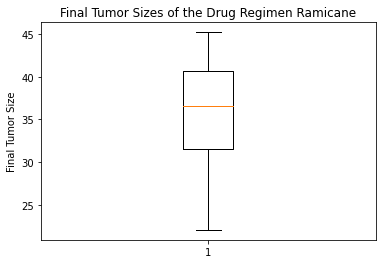

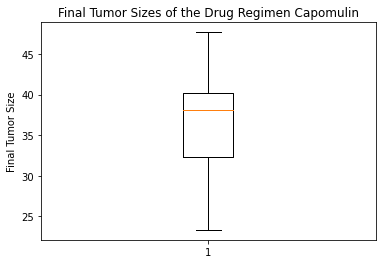

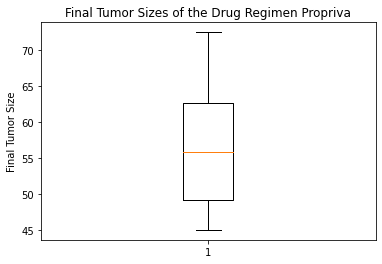

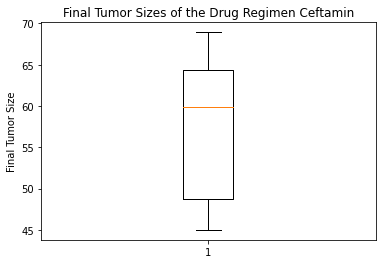

,drug_regimen,IQR,lowerq,upperq,median,lower_bound,upper_bound
0,Ramicane,9.098537,31.560470,40.659006,36.561652,17.912664,54.306811
1,Capomulin,7.781863,32.377357,40.159220,38.125164,20.704562,51.832015
2,Propriva,13.447911,49.122969,62.570880,55.841410,28.951103,82.742746
3,Ceftamin,15.577752,48.722078,64.299830,59.851956,25.355450,87.666458


In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drugs_iqr_quartiles_df = pd.DataFrame()
drugs_iqr_quartiles_df['drug_regimen'] = most_promising_treatment_df['drug_regimen']

for drug in most_promising_treatment_df['drug_regimen']:
    drug_results = final_tumor_volume_mouse_by_drug_df.loc[
        final_tumor_volume_mouse_by_drug_df['drug_regimen'] == drug
    ]
    quartiles = drug_results['last_tumor_volume_size'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    median = quartiles[0.5]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    drugs_iqr_quartiles_df.loc[drugs_iqr_quartiles_df.index[drugs_iqr_quartiles_df['drug_regimen'] == drug], 'IQR'] = iqr
    drugs_iqr_quartiles_df.loc[drugs_iqr_quartiles_df.index[drugs_iqr_quartiles_df['drug_regimen'] == drug], 'lowerq'] = lowerq
    drugs_iqr_quartiles_df.loc[drugs_iqr_quartiles_df.index[drugs_iqr_quartiles_df['drug_regimen'] == drug], 'upperq'] = upperq
    drugs_iqr_quartiles_df.loc[drugs_iqr_quartiles_df.index[drugs_iqr_quartiles_df['drug_regimen'] == drug], 'median'] = median
    drugs_iqr_quartiles_df.loc[drugs_iqr_quartiles_df.index[drugs_iqr_quartiles_df['drug_regimen'] == drug], 'lower_bound'] = lower_bound
    drugs_iqr_quartiles_df.loc[drugs_iqr_quartiles_df.index[drugs_iqr_quartiles_df['drug_regimen'] == drug], 'upper_bound'] = upper_bound

    fig1, ax1 = plt.subplots()
    
    ax1.set_title(f'Final Tumor Sizes of the Drug Regimen {drug}')
    ax1.set_ylabel('Final Tumor Size')
    ax1.boxplot(drug_results['last_tumor_volume_size'])
    plt.show()

drugs_iqr_quartiles_df


## Line and Scatter Plots

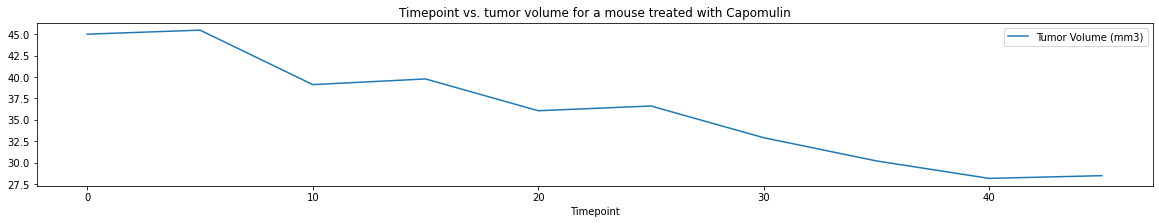

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Found all mice treated with Capomulin
mice_treated_with_capomulin = clean_mouse_metadata_results.loc[
    clean_mouse_metadata_results['Drug Regimen'] == 'Capomulin'
]
# Pick a random mouse treated with Capomulin
mouse_index = mice_treated_with_capomulin.sample()['Mouse ID']
# Get all data for this mouse
line_graph_data = clean_mouse_metadata_results.loc[
    clean_mouse_metadata_results['Mouse ID'].isin(mouse_index)][['Timepoint','Tumor Volume (mm3)']]
# Line plot this data
line_graph_data = line_graph_data.set_index('Timepoint')
line_graph_data.plot(
    kind="line",
    figsize=(20,3),
    title = "Timepoint vs. tumor volume for a mouse treated with Capomulin"
)
plt.show()

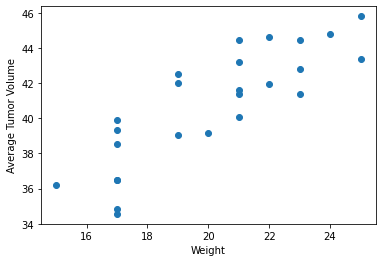

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Prepare plot data
scatter_plot_data = mice_treated_with_capomulin.groupby(["Mouse ID", "Weight (g)"]).agg(
    {
        "Tumor Volume (mm3)" : "mean"
    }
)
scatter_plot_data.reset_index(inplace=True)
scatter_plot_data.set_index('Mouse ID', inplace=True)

# Plot scatter graph
plt.scatter(scatter_plot_data['Weight (g)'],scatter_plot_data['Tumor Volume (mm3)'])
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

## Correlation and Regression

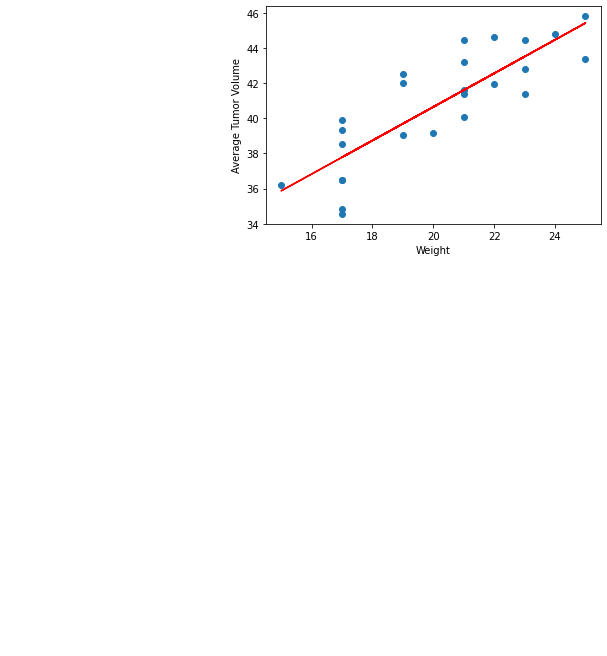

The correlation between both factors is 0.84


In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = scatter_plot_data['Weight (g)']
y_values = scatter_plot_data['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "blue")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

# Calculate correlation
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")


# Observations